# Tujuan
## 1. Perusahaan hendak mengenal lebih baik pelanggannya
## 2. Perusahaan dapat membuat strategi pemasaran yang tepat & efisien
## 3. Teknikal -> Mengelompokan pelanggan berdasarkan kesamaan karakter

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from pathlib import Path
from IPython.display import display

In [5]:
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")
# df.to_csv(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science in Marketing - Customer Segmentation with Python\File Dokumentasi\File CSV\customer_segments.csv", index=None, header=True)
# df.to_excel(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science in Marketing - Customer Segmentation with Python\File Dokumentasi\File Excel\customer_segments.xlsx", index=None, header=True)
display(df.head())

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206


In [22]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


None

,Umur,NilaiBelanjaSetahun
count,50.000000,5.000000e+01
mean,37.500000,7.069875e+06
std,14.673661,2.590619e+06
min,14.000000,2.722700e+06
25%,25.000000,5.257530e+06
50%,35.000000,5.980077e+06
75%,49.750000,9.739615e+06
max,64.000000,1.088451e+07


Kesimpulan
Setelah melakukan pemanggilan data dan melihat informasi data yang kamu miliki, kamu akhirnya mengetahui bahwa:

1. Data yang akan digunakan terdiri dari 50 baris dan 7 kolom
2. Tidak ada nilai null pada data
3. Dua kolom memiliki tipe data numeric dan lima data bertipe string

Tips:
Dalam setiap project machine learning, kita harus memahami informasi dasar dari data yang kita miliki sebelum melakukan analisa lebih lanjut. Dengan melakukan hal ini, kita bisa memastikan tipe data dari masing-masing kolom sudah benar, mengetahui apakah ada data null di tiap tiap kolom, dan juga mengetahui nama-nama kolom di dataset yang kita gunakan. Informasi ini nantinya akan menentukan proses apa yang perlu kita lakukan selanjutnya.

## Eksplorasi data Numerik

<Figure size 432x288 with 0 Axes>

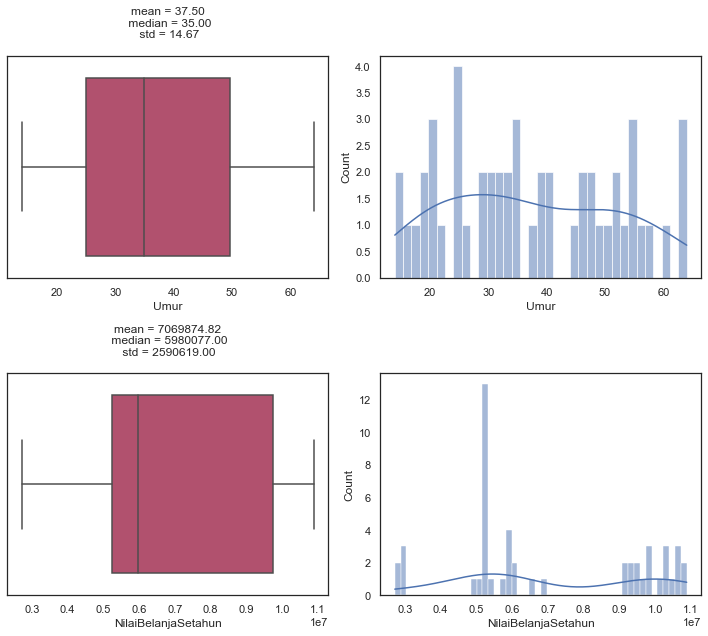

In [38]:
sns.set(style="white")
plt.clf()

def observasi_num(features):
    fig, axs = plt.subplots(2, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
        sns.boxplot(x = df[kol], palette="flare", ax = axs[i][0])
        sns.histplot(data = df[kol],bins=df[kol].nunique(), ax = axs[i][1], kde=True)
        axs[i][0].set_title("mean = %.2f\n median = %.2f\n std = %.2f\n" %(df[kol].mean(), df[kol].median(), df[kol].std()))
    # plt.setp(axs)
    plt.tight_layout()
    plt.show()

kolom_numerik = ["Umur", "NilaiBelanjaSetahun"]
observasi_num(kolom_numerik)

## Eksplorasi Data Kategorikal